# Creating 'Open-Box' Models

This jupyter project proposes an 'open box' estimator which is trained using pair of two features. The idea here is that we can only visualize decision boundaries when there are only two features. However, in most ML problems, we have more than 2 features, so it is not possible to apply visualization strategies such as [sklearn classifier comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). In order to handle that, I am going to propose an ensemble of models in which each model is trained with only two features. The advantage of doing so is that we can visualize the decision boundaries and hence give a better hyperparameter tuning (and see the influence of each tuning). The final estimation is given as the average of probabilities from each models' probability estimation. For example, suppose that we have 4 features A, B, C and D. If we train the features in pairs, we are going to have one estimator for each pair of features: A and B; A and C; A and D; B and C; B and D; C and D. The total number for models for a case with 4 features is 6 which is 3 + 2 + 1. Each of those 6 models is trained and one probability estimation is given for a given point. The final estimator is the average of those 6 probabilities estimations. Let's try an example. First, I am going to import a toy dataset:

In [1]:
# Import dataset and convert to a pandas dataframe
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_breast_cancer()
breast = pd.DataFrame(data['data'], columns=data['feature_names'])
breast['target'] = data['target']

In [2]:
# Visualize header
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
breast.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Since 30 features is too much for a toy example, I am going to select only the 4 first features for this toy example:

In [4]:
feat_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
breast = breast[feat_names + ['target']]

Now, let's visualize the dataset using pairplot from seaborn:

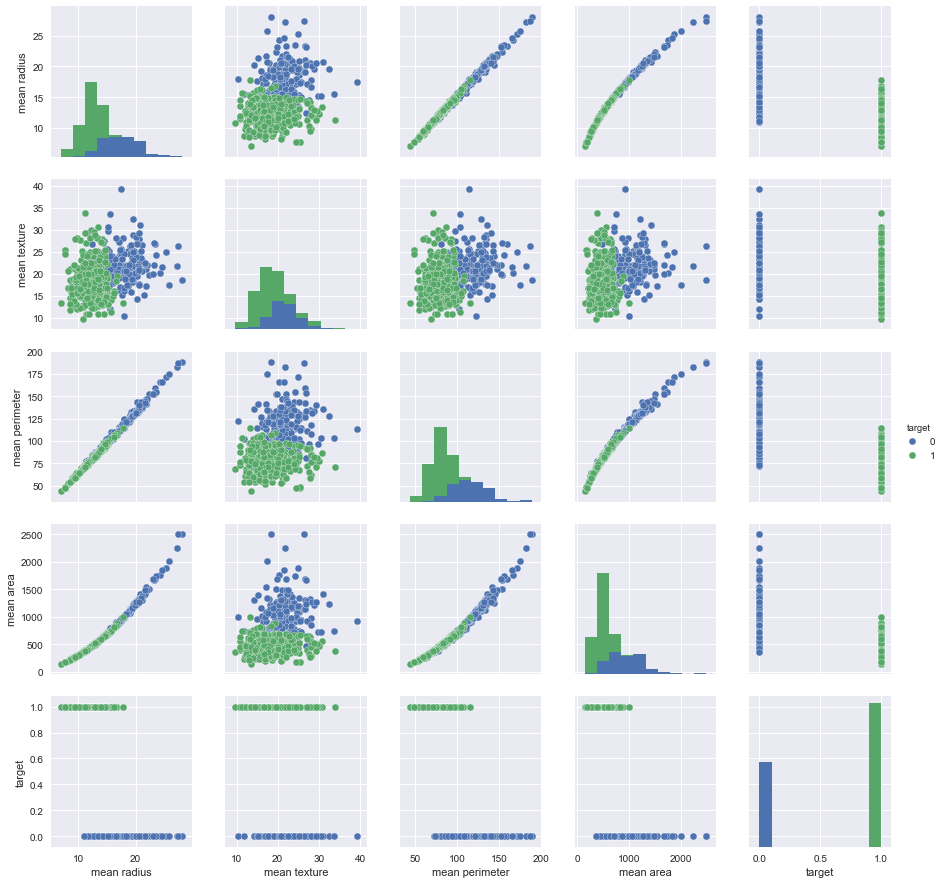

In [5]:
import seaborn as sns
sns.pairplot(breast, hue='target')

Next, let's split the dataset into training and testing subsets and check the performance in some estimators:

In [6]:
# Split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

y = breast['target']
X = breast.drop('target', axis=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

### Get score on some default estimators

In [7]:
# Get the score using some estimators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "Logistic Reg"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(random_state=42, kernel="linear", C=0.025),
    SVC(random_state=42, gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(random_state=42, max_depth=5),
    RandomForestClassifier(random_state=42),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)]

In [8]:
# Check the training and testing score for those estimators
for name, clf in zip(names, classifiers):
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Print scores
    print("Training score for {} is {:.4f}".format(name, clf.score(X_train, y_train)))
    print("Test score for {} is {:.4f}".format(name, clf.score(X_test, y_test)))
    print("="*80)

Training score for Nearest Neighbors is 0.9187
Test score for Nearest Neighbors is 0.9035
Training score for Linear SVM is 0.8989
Test score for Linear SVM is 0.9298
Training score for RBF SVM is 1.0000
Test score for RBF SVM is 0.6228
Training score for Gaussian Process is 0.9011
Test score for Gaussian Process is 0.9386
Training score for Decision Tree is 0.9516
Test score for Decision Tree is 0.8860
Training score for Random Forest is 0.9934
Test score for Random Forest is 0.9386
Training score for Neural Net is 0.7538
Test score for Neural Net is 0.7807
Training score for AdaBoost is 0.9516
Test score for AdaBoost is 0.9298
Training score for Naive Bayes is 0.8879
Test score for Naive Bayes is 0.9211
Training score for Logistic Reg is 0.9011
Test score for Logistic Reg is 0.9386


We can see that the best performance in our benchmark is with Linear SVM, Random FOrest, AdaBoost, Naive Bayes and Log Reg. Let's see if combining pairs of features we can have a better estimation :) First, I am going to show the core function for visualization of decision boundaries and perform a test of it working. The function is:

In [9]:
from matplotlib.colors import ListedColormap

def map_decision_boundary(clf, feature_A, feature_B, target, ax=None, plt_title=''):
    # Get limits of the mesh grid
    x_min, x_max = min(feature_A), max(feature_A)
    y_min, y_max = min(feature_B), max(feature_B)
    
    # Get step of the mesh grid
    h_x = (x_max - x_min)/10
    h_y = (y_max - y_min)/10
    
    # Create the meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max+h_x, h_x),
                         np.arange(y_min, y_max+h_x, h_y))
    
    # Get prediction values (either probabilities or from decision function)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Convert Z to 2D
    Z = Z.reshape(xx.shape)
    
    # Plot contour function    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    if ax is None:
        ax=plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(feature_A, feature_B, c=target, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.title(plt_title)
    #plt.show()


Let's test this function. I will get a pair of features, train a model and visualize it:

In [10]:
# Get a pair of atributes
pair = ['mean radius', 'mean texture']
X_train[pair].head()

,mean radius,mean texture
68,9.029,17.33
181,21.090,26.57
63,9.173,13.86
248,10.650,25.22
60,10.170,14.88


In [11]:
# Train a classifier in this pair
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train[pair], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

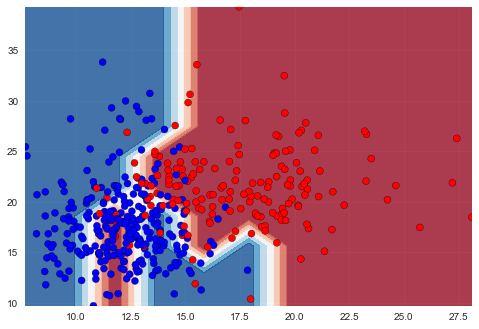

In [12]:
# Visualize the decision boundary
feature_A = X_train[pair[0]].values
feature_B = X_train[pair[1]].values
target = y_train.values
map_decision_boundary(clf, feature_A, feature_B, target)

In the previous plot, we have a visualization of the decision boundaries for the decision tree using the first two features. Let's try with another estimators:

In [13]:
# Test more estimators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "Logistic Reg"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression()]

/Users/wittmann/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


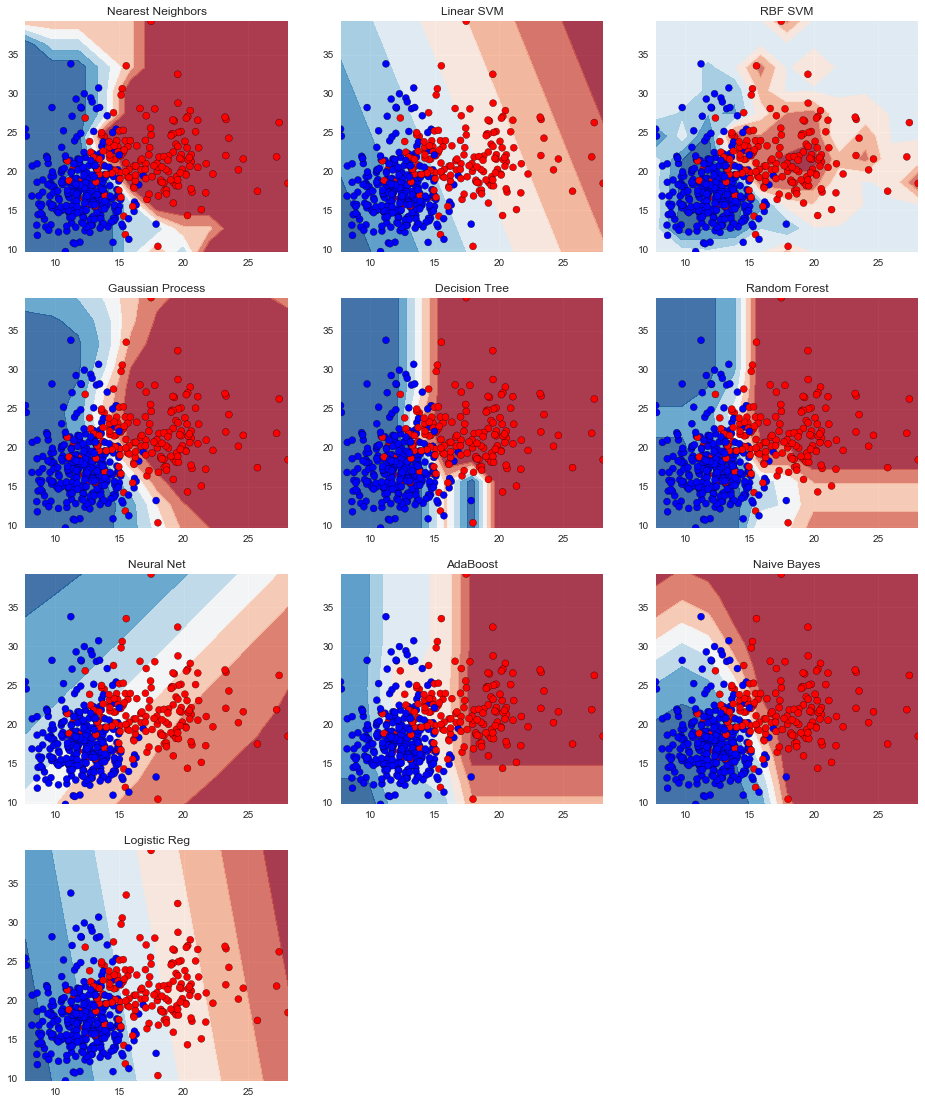

In [14]:
i = 1
figure = plt.figure(figsize=(16, 50))
for name, clf in zip(names, classifiers):
    # Fit the classifier
    clf.fit(X_train[pair], y_train)
    
    # Visualize the decision boundary
    feature_A = X_train[pair[0]].values
    feature_B = X_train[pair[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(10, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=name)
    i += 1
    figure.show()

We can see that some estimators can draw better decision boundaries. We can only visualize this since we are using 2 features from the set. The visualization is going to help us to define either the best estimator or best parameters for training our model. Let's now create a visualization of all models created from pairs of estimators. As base estimator, I am going to use Naive Bayes since it is very fast and does not require hyperparameter tuning. 

In [15]:
feat_names

['mean radius', 'mean texture', 'mean perimeter', 'mean area']

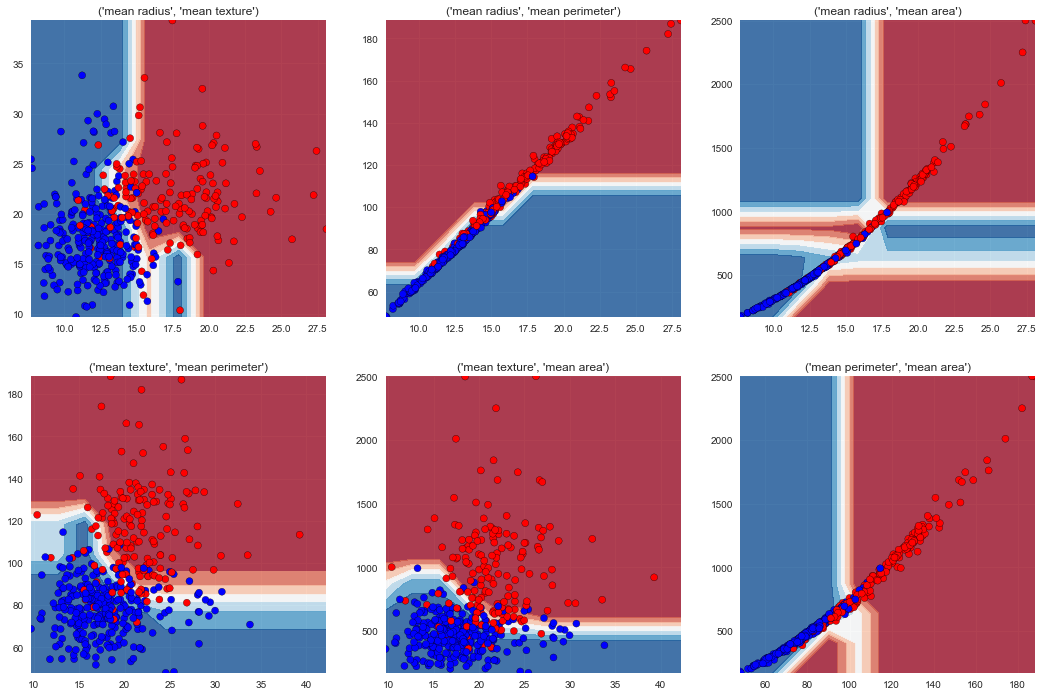

In [16]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

from itertools import combinations

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [17]:
y_score_final = np.mean(probas, axis=0)[:,1]

In [18]:
y_true = y_test
y_pred = np.round(y_score_final)

from sklearn.metrics import accuracy_score
print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9298


That's great news! The accuracy increased from 0.89 to 0.93! Now, let's test the same strategy with the estimator with the highest score which is Random Forest

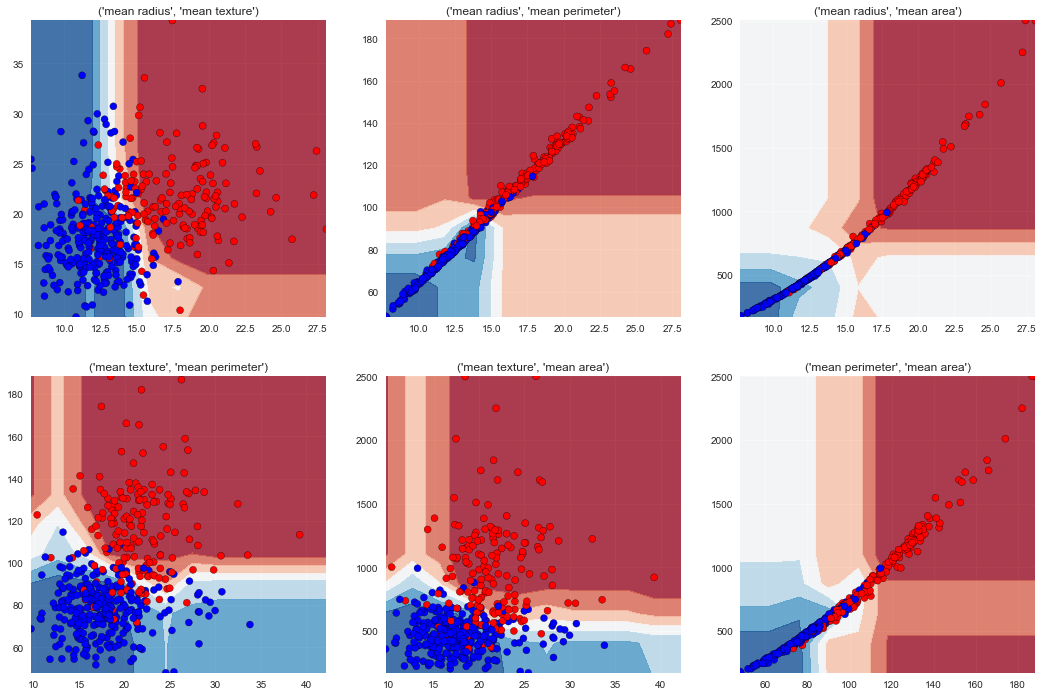

In [19]:
clf = RandomForestClassifier(random_state=42, max_depth=5)

from itertools import combinations

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [20]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9386


In this case we got the very same score as before. But as advantage, now, we can visualize the decision boundary of each single model and even update specific models if I want to. For example, for each single model I will perform hyperparameter optimization:

/Users/wittmann/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/wittmann/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


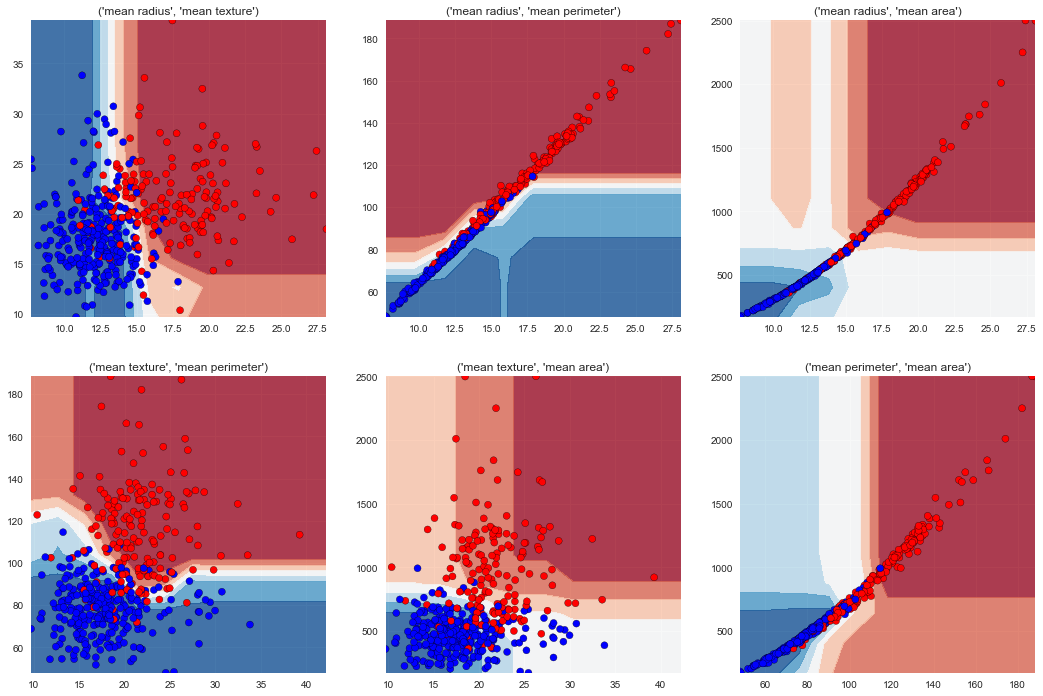

In [21]:
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators': (5, 10, 30, 50, 100),
              'max_features':      ['auto', 'sqrt', 'log2', None],
              'max_depth':         [None, 2, 5, 10, 20, 50]}
clf = RandomForestClassifier(random_state=42)

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    
    grid_obj = GridSearchCV(clf, parameters)
    #clf.fit(X_train[list(pair_names)], y_train)
    
    # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train[list(pair_names)], y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(best_clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(best_clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [22]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9386


No big change was observed. Let's finally check some other estimators. 

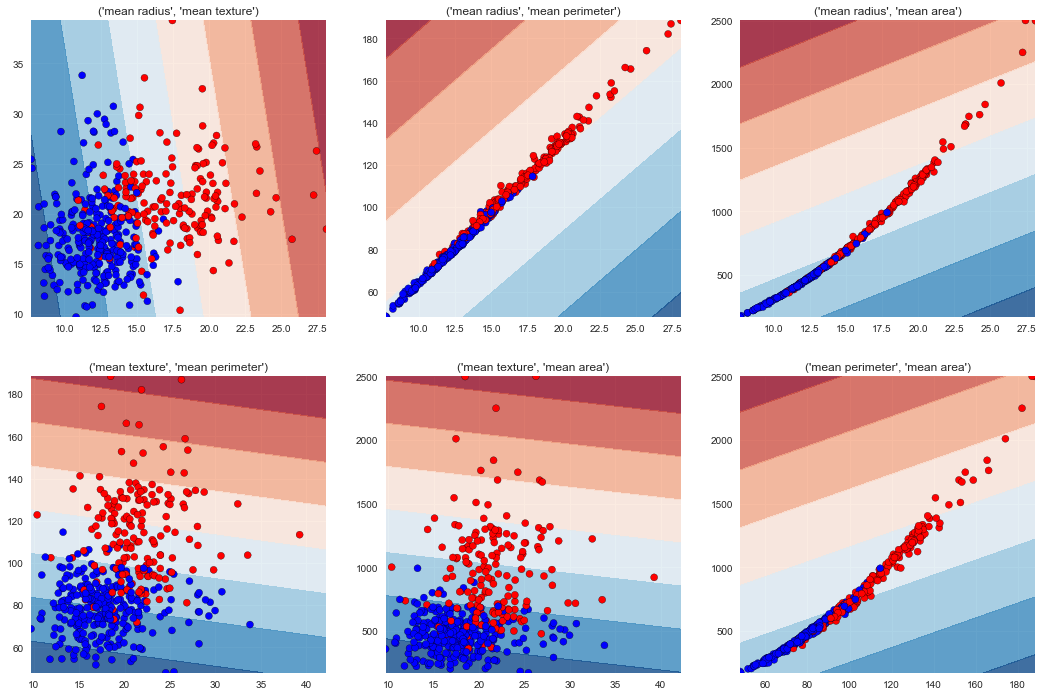

In [23]:
clf = LogisticRegression(random_state=42)

from itertools import combinations

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [24]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9386


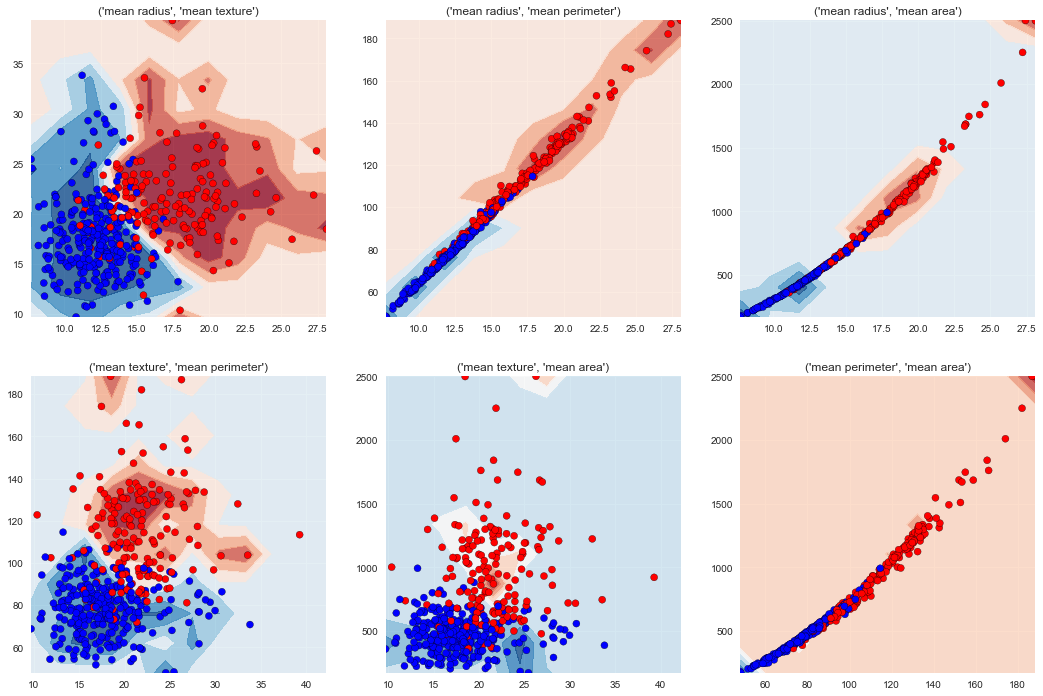

In [25]:
clf = SVC(random_state=42, probability=True)

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [26]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9298


We can see that the performance highly increased when compared to the previous test score of 0.62. The As advantage, we can observe that some of the decision boundaries can be improved. For example, the bottom right graph shows that SVM classifying most of the points as red. This might be due to the sensitivity of SVM to feature scaling. Let's try again but performing feature scaling. 

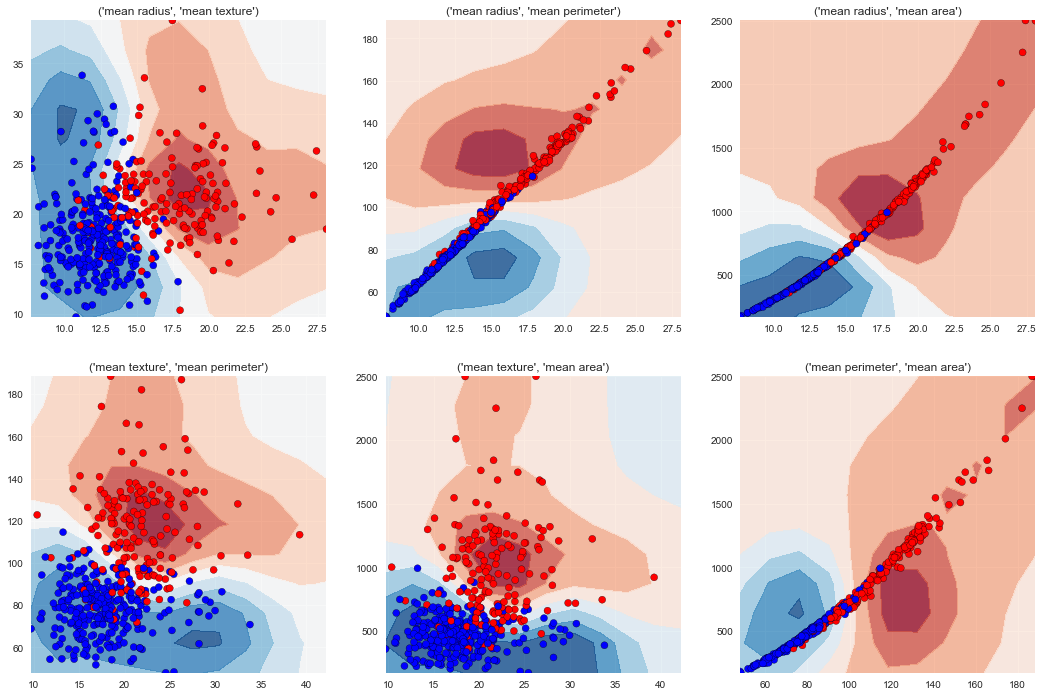

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(2, 3, i)
    map_decision_boundary(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [28]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.9298


The final mean accuracy is the same, however, we have now a 'better' distributed decision boundary in both classes. 